In [2]:
import vizdoom as vzd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
"""available_buttons = 
	{  
		MOVE_FORWARD
		MOVE_BACKWARD
		TURN_LEFT_RIGHT_DELTA
		MOVE_FORWARD_BACKWARD_DELTA
		MOVE_LEFT_RIGHT_DELTA
	}"""


possible_actions = np.zeros((8,6),dtype=int).tolist()
possible_actions[0] = [1,0,0,0,0]
possible_actions[1] = [0,1,0,0,0]
possible_actions[2] = [0,0,-45,0,0]
possible_actions[3] = [0,0,45,0,0]
possible_actions[4] = [0,0,0,50,0]
possible_actions[5] = [0,0,0,-50,0]
possible_actions[6] = [0,0,0,0,30]
possible_actions[7] = [0,0,0,0,-30]
possible_actions

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, -45, 0, 0],
 [0, 0, 45, 0, 0],
 [0, 0, 0, 50, 0],
 [0, 0, 0, -50, 0],
 [0, 0, 0, 0, 30],
 [0, 0, 0, 0, -30]]

In [4]:
def to_grid(mp, cell_size=10):
    """Receives global map and returns a grid of the same size, with walls as 0 and empty space as 255."""
    grid = np.full((mp.shape[0]//cell_size, mp.shape[1]//cell_size), 255)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if np.any(mp[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size] == 0):
                grid[i,j] = 0
    return grid

(240, 320)
[134.17538452 500.2789917    0.         188.61877446]
[134.17538452 500.2789917    0.          98.61877444]


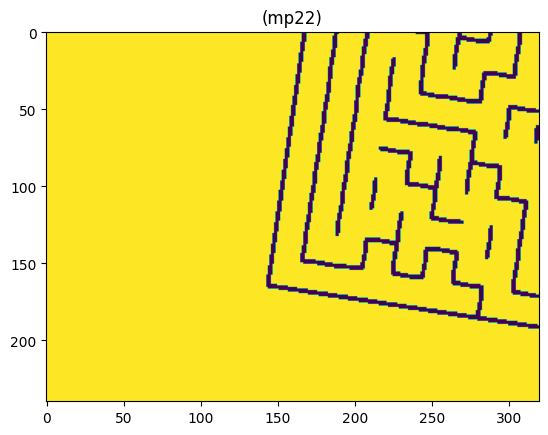

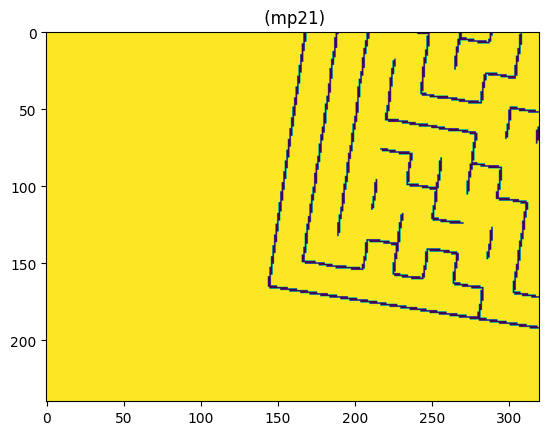

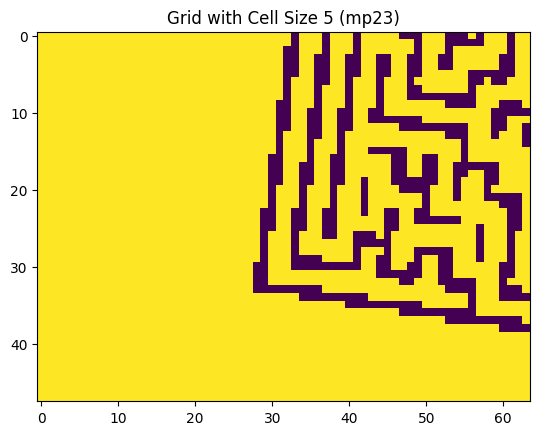

[105.24874878 691.22961426   0.          53.61877443]


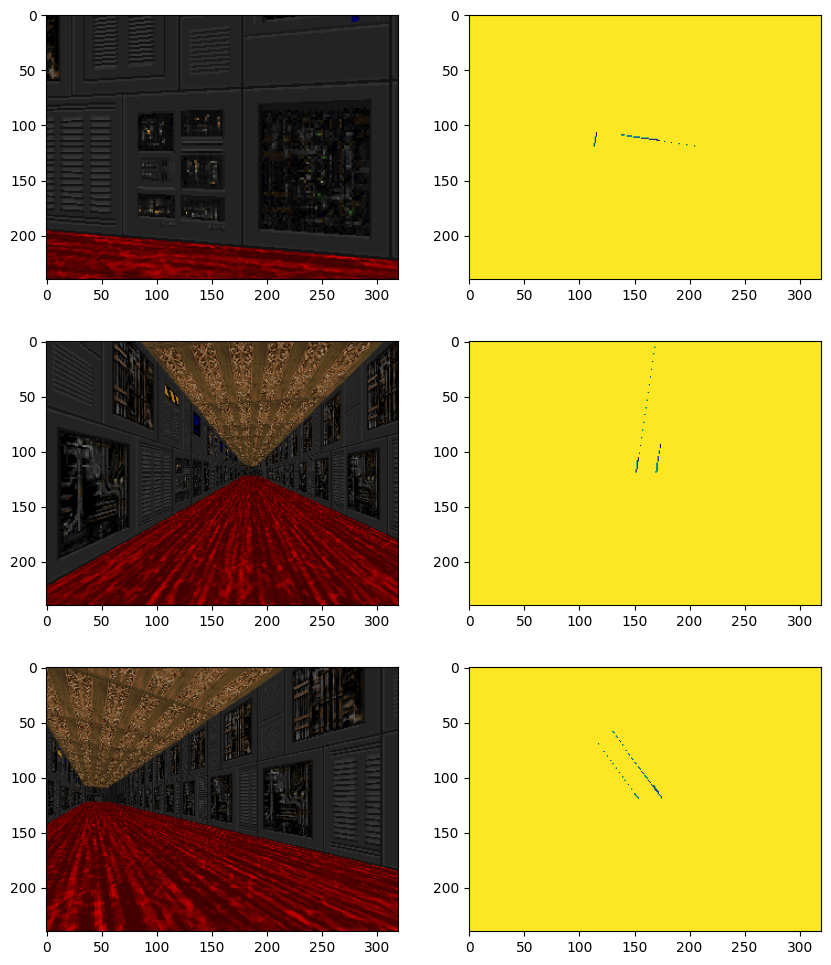

In [11]:
import sys
sys.path.append('../')

from matplotlib import pyplot as plt
from DataGeneration.local_map import look_around

from DataGeneration.local_map import map_to_black
from DataGeneration.local_map import thicken_walls



game = vzd.DoomGame()
game.load_config('../data/resources/datagen.cfg')
game.set_doom_scenario_path('../data/maps_1key_noaug/30x30.wad')

game.set_automap_mode(vzd.AutomapMode.WHOLE)
game.set_seed(1)
game.set_render_hud(False)
game.set_objects_info_enabled(True)
game.set_screen_format(vzd.ScreenFormat.RGB24)
game.set_labels_buffer_enabled(True)
game.set_render_corpses(True)
game.set_doom_map('map03')
game.init()
game.new_episode()
game.get_state()

st1 = game.get_state()

cam1 = st1.screen_buffer
#print(len(st1.objects))

for obj in st1.objects:
    if obj.name == 'RedCard':
        if obj.id == 0:
            print('Found')

mp1 = look_around(st1)
print(mp1.shape)

var1 = st1.game_variables

print(var1)

game.make_action([0,0, 90, 0, 0], 1)

st2 = game.get_state()

var2 = st2.game_variables

print(var2)

cam2 = st2.screen_buffer

mp2 = look_around(st2)

mp21 = map_to_black(st2.automap_buffer)
mp22 = thicken_walls(mp21)
mp23 = to_grid(mp22, cell_size=5)

plt.title("(mp22)")
plt.imshow(mp22)
plt.show()
plt.title(" (mp21)")

plt.imshow(mp21)
plt.show()

plt.imshow(mp23)
plt.title("Grid with Cell Size 5 (mp23)")
plt.show()

game.make_action([0,0, 0, 100, 0], 19) # Walking action takes more frames to complete (19 in this case). This is because of hard cap on speed.
game.make_action([0,0, 45, 0, 0], 1)

st3 = game.get_state()

var3 = st3.game_variables

print(var3)

cam3 = st3.screen_buffer

mp3 = look_around(st3)

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

axs[0, 0].imshow(cam1)
axs[0, 1].imshow(mp1)
axs[1, 0].imshow(cam2)
axs[1, 1].imshow(mp2)
axs[2, 0].imshow(cam3)
axs[2, 1].imshow(mp3)

plt.show()

game.close()






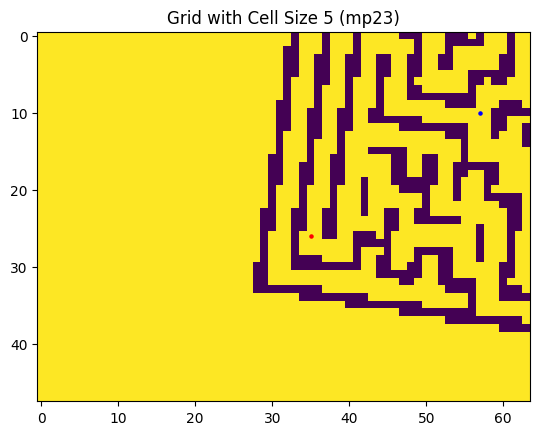

255.0
255.0


In [48]:



plt.imshow(mp23)
plt.title("Grid with Cell Size 5 (mp23)")
plt.scatter(35, 26, color='red', s=5)  # Add a red dot at (10, 20)
plt.scatter(57, 10, color='blue', s=5)  # Add a red dot at (10, 20)


plt.show()
print(mp3[35][26])
print(mp3[10][59])


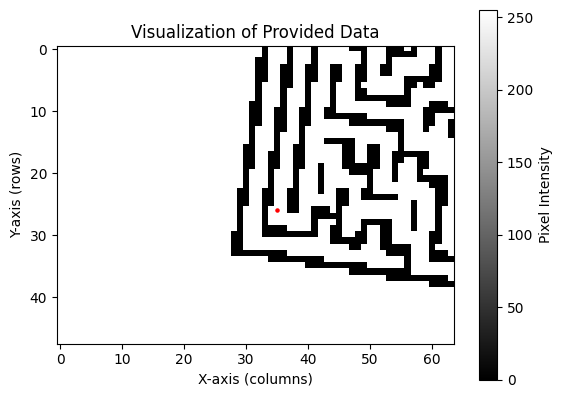

[255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 

In [41]:
plt.imshow(mp23, cmap='gray', interpolation='nearest')
plt.colorbar(label="Pixel Intensity")  # Add colorbar for reference\
plt.scatter(35, 26, color='red', s=5)  # Add a red dot at (10, 20)

plt.title("Visualization of Provided Data")
plt.xlabel("X-axis (columns)")
plt.ylabel("Y-axis (rows)")
plt.show()


[255 255 255   0   0   0 255   0 255 255 255   0 255 255]
0
[0 0 0 0]


In [7]:
x1, y1 = 134.17538452, 500.2789917
x2, y2 = 105.24874878, 691.22961426 
dist = np.sqrt((x2-x1)**2 + (y2-y1)**2)
print(dist)

193.12920677951897


In [47]:
plan_map = mp23.copy()

start_pos = (35, 26)
end_pos = (57, 10)